C:\Users\cesar\AppData\Local\Temp\ipykernel_16400\4229650644.py:18: RuntimeWarning: divide by zero encountered in log
  C = np.log(C)
c:\Users\cesar\anaconda4\envs\rate_matching\lib\site-packages\ot\bregman\_sinkhorn.py:506: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


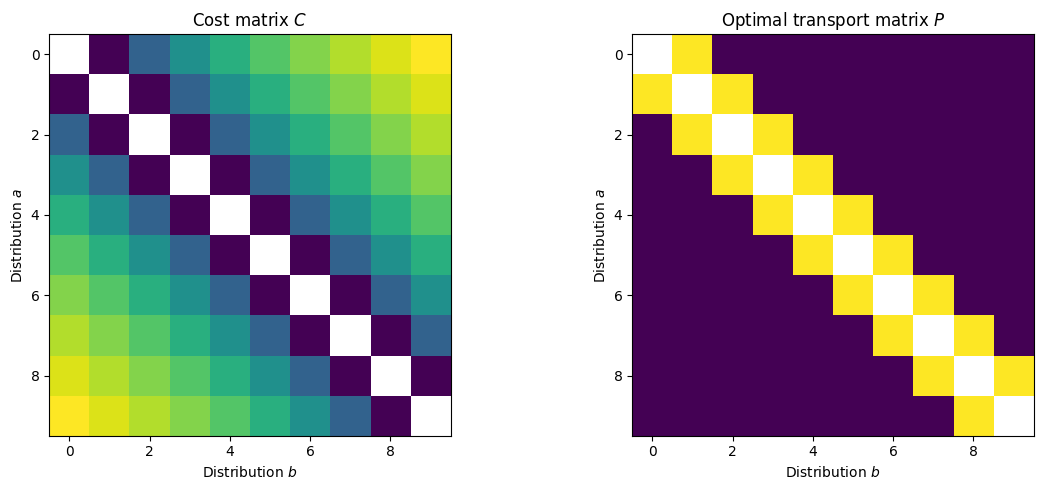

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ot  # Import Python Optimal Transport library

# Setting up the distributions
# Uniform distribution of 10 points from 0 to 1
n_points = 10
a = np.ones(n_points) / n_points  # Distribution a
b = np.ones(n_points) / n_points  # Distribution b

# Generate positions for each point in the distributions
x = np.linspace(0, 1, n_points).reshape(-1, 1)  # Positions for a
y = np.linspace(0, 1, n_points).reshape(-1, 1)  # Positions for b

# Cost matrix: Euclidean distance
C = ot.dist(x, y)
C = C / C.max()  # Normalize cost for stability
C = np.log(C)

# Regularization parameter
lambda_reg = 0.05  # Small lambda means more regularization

# Solve the regularized optimal transport problem using Sinkhorn algorithm
P = ot.sinkhorn(a, b, C, lambda_reg)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot cost matrix
ax[0].imshow(C, interpolation='nearest')
ax[0].set_title('Cost matrix $C$')
ax[0].set_xlabel('Distribution $b$')
ax[0].set_ylabel('Distribution $a$')

# Plot optimal transport matrix
ax[1].imshow(P, interpolation='nearest')
ax[1].set_title('Optimal transport matrix $P$')
ax[1].set_xlabel('Distribution $b$')
ax[1].set_ylabel('Distribution $a$')

plt.tight_layout()
plt.show()
